In [1]:
import numpy as np 
import pandas as pd

import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
from PIL import Image
from matplotlib.pyplot import figure

In [2]:
import numpy as np 
import pandas as pd

import os
dir_black = os.path.join('Soil types/Black Soil')
dir_Cinder = os.path.join('Soil types/Cinder Soil')
dir_Laterite = os.path.join('Soil types/Laterite Soil')
dir_peat = os.path.join('Soil types/Peat Soil')
dir_yellow = os.path.join('Soil types/Yellow Soil')

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
image_size = 224
batch_size = 16


target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SHAPE = (224, 224)
train_datagen = ImageDataGenerator(rescale=1. / 255.,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        validation_split=0.15)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255., validation_split=0.15)
valid_generator = valid_datagen.flow_from_directory(
   'Soil types/', 
    subset="validation", 
    batch_size = batch_size,
    target_size=IMAGE_SHAPE
)

train_generator = train_datagen.flow_from_directory(
        'Soil types/', 
        target_size=(224, 224),
        batch_size = batch_size)

Found 21 images belonging to 5 classes.
Found 156 images belonging to 5 classes.


In [6]:
# for image_batch, label_batch in train_generator:
#   break
# image_batch.shape, label_batch.shape

In [7]:
# print (train_generator.class_indices)

# labels = '\n'.join(sorted(train_generator.class_indices.keys()))

# with open('labels.txt', 'w') as f:
#   f.write(labels)

In [8]:
model = tf.keras.models.Sequential([
    

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(5, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [10]:


model.compile(
  optimizer="adam",
  loss='categorical_crossentropy',
  metrics=['accuracy'])

In [11]:

from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('best_model.hdf5', monitor = 'val_accuracy', verbose = 1, save_best_only = True)

In [12]:
history = model.fit(
        train_generator,  
        epochs = 30,
        validation_data= valid_generator,
        callbacks = [checkpoint])

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 1.6143 - accuracy: 0.2308
Epoch 1: val_accuracy improved from -inf to 0.19048, saving model to best_model.hdf5
10/10 [==============================] - 2s 143ms/step - loss: 1.6143 - accuracy: 0.2308 - val_loss: 1.5714 - val_accuracy: 0.1905
Epoch 2/30


/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - ETA: 0s - loss: 1.5387 - accuracy: 0.3141
Epoch 2: val_accuracy improved from 0.19048 to 0.38095, saving model to best_model.hdf5
10/10 [==============================] - 1s 122ms/step - loss: 1.5387 - accuracy: 0.3141 - val_loss: 1.3579 - val_accuracy: 0.3810
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 1.3229 - accuracy: 0.3269
Epoch 3: val_accuracy improved from 0.38095 to 0.42857, saving model to best_model.hdf5
10/10 [==============================] - 1s 115ms/step - loss: 1.3229 - accuracy: 0.3269 - val_loss: 1.0369 - val_accuracy: 0.4286
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 1.0946 - accuracy: 0.3974
Epoch 4: val_accuracy improved from 0.42857 to 0.47619, saving model to best_model.hdf5
10/10 [==============================] - 1s 120ms/step - loss: 1.0946 - accuracy: 0.3974 - val_loss: 0.9511 - val_accuracy: 0.4762
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 1.10

In [13]:
import matplotlib.pyplot as plt

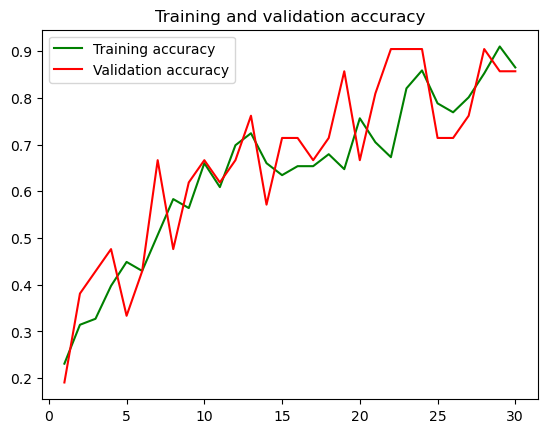

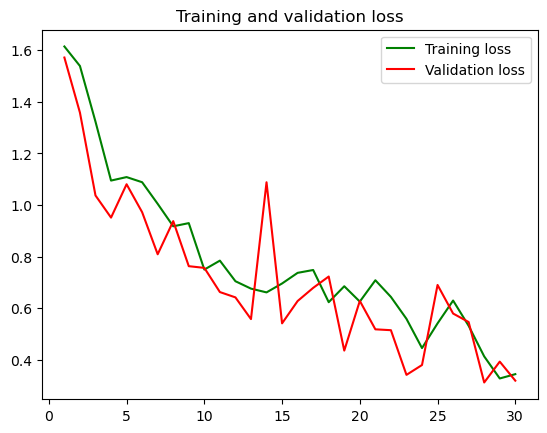

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
model.save('my_model.h5')

In [16]:
model.save(filepath="save_model/")

INFO:tensorflow:Assets written to: save_model/assets


INFO:tensorflow:Assets written to: save_model/assets


In [33]:
from tensorflow.keras.models import load_model
plant = load_model('best_model.hdf5')

In [18]:
class_names = sorted(os.listdir('Soil types'))
class_names.pop(0)
class_names

['Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil']

In [19]:
def eval_model(model):
    class_names = ['Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil']
    val_gen= valid_datagen.flow_from_directory(
                    directory='Soil types/',
                    target_size = (224,224), 
                    shuffle = False,
                    classes=class_names , # classes to predict
                    seed=43 ,# to make the result reproducible
                    subset = "validation")

    model_preds = model.predict(val_gen)
    predicted_labels = np.argmax(model_preds, axis=1)
    classes = val_gen.classes



   # list of target class names
    print(classification_report(predicted_labels,classes))


    cm = confusion_matrix(classes, predicted_labels)

    figure(figsize=(20, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.GnBu)
    plt.title('Confusion matrix',fontsize=15)
    plt.colorbar()
    plt.xticks(range(5),class_names, fontsize=12,rotation=60)
    plt.yticks(range(5),class_names, fontsize=12,verticalalignment="center")
  # Iteating over cells to write number of prediction for each class
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > np.max(cm)/2. else "black")
    plt.xlabel('Predicted label',fontsize=15)
    plt.ylabel('True label',fontsize=15)

Found 21 images belonging to 5 classes.
1/1 [==============================] - 0s 102ms/step
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.67      0.80         6
           2       1.00      1.00      1.00         4
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         4

    accuracy                           0.90        21
   macro avg       0.91      0.93      0.91        21
weighted avg       0.93      0.90      0.90        21



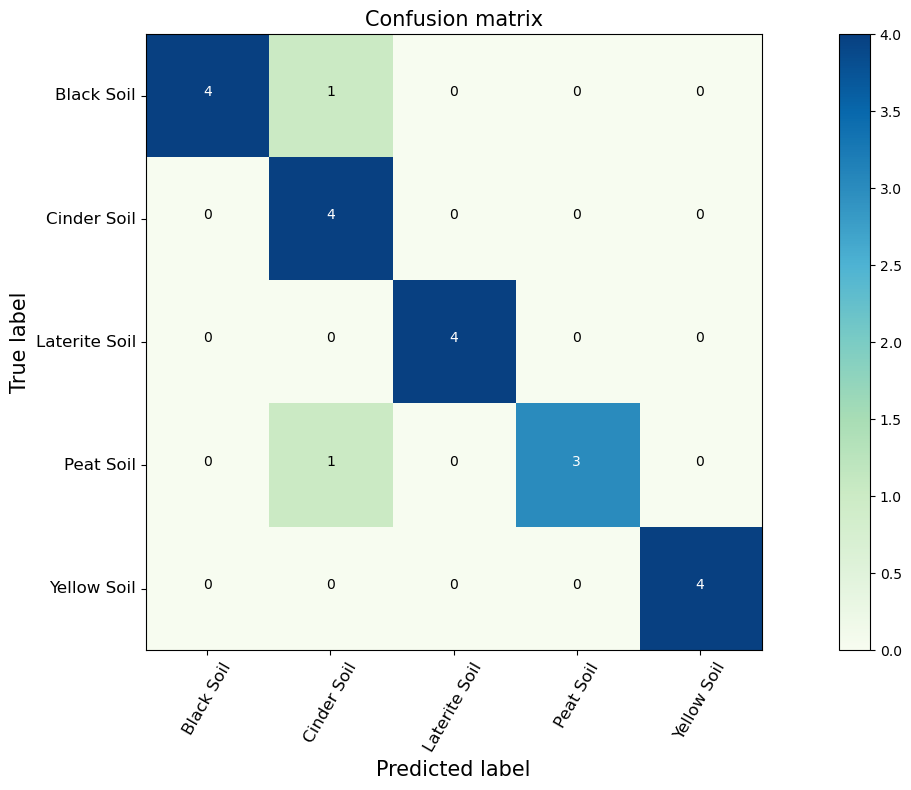

In [20]:
eval_model(plant)

In [21]:
preds = sorted(os.listdir('Soil types'))
preds_idx = [0,1,2,3,4,5]
preds = dict(zip(preds_idx,preds))
preds.pop(0)
preds

{1: 'Black Soil',
 2: 'Cinder Soil',
 3: 'Laterite Soil',
 4: 'Peat Soil',
 5: 'Yellow Soil'}

1/1 [==============================] - 0s 14ms/step
True Label: Laterite Soil
Prediction: [[5.67974457e-05 5.57147141e-04 9.79282439e-01 7.65577145e-03
  1.24478815e-02]]


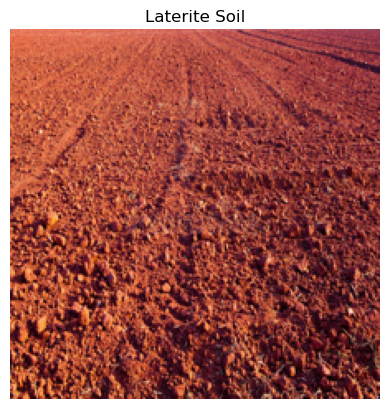

In [52]:

img = Image.open('/Users/macbook/Desktop/laterite-soil-texture-red-gravel-floor-background-45027634.jpg')


img = img.resize((224, 224))


img_array = np.array(img) / 255.0


img_array = np.expand_dims(img_array, axis=0)


pred = model.predict(img_array)


true_label = np.argmax(pred)


print('True Label:', class_names[true_label])


plt.axis("off")
plt.imshow(img)
plt.title(class_names[true_label])
print('Prediction:', pred)

In [25]:
print(pred)

[[9.9103492e-01 1.4669499e-03 2.1927410e-06 7.4958922e-03 1.4074466e-07]]


In [26]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /var/folders/nz/ktm602c15h1d27w9gdksxv940000gn/T/tmpsss7mmr6/assets


INFO:tensorflow:Assets written to: /var/folders/nz/ktm602c15h1d27w9gdksxv940000gn/T/tmpsss7mmr6/assets
2024-03-14 22:52:45.385660: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-03-14 22:52:45.385672: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-03-14 22:52:45.386118: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/nz/ktm602c15h1d27w9gdksxv940000gn/T/tmpsss7mmr6
2024-03-14 22:52:45.387146: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-03-14 22:52:45.387151: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/nz/ktm602c15h1d27w9gdksxv940000gn/T/tmpsss7mmr6
2024-03-14 22:52:45.389650: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-03-14 22:52:45.390435: I tensorflow/cc/saved_model/load

In [27]:
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

49058 microseconds.
2024-03-14 22:52:45.461595: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
Summary on the non-converted ops:
---------------------------------
 * Accepted dialects: tfl, builtin, func
 * Non-Converted Ops: 15, Total Ops 32, % non-converted = 46.88 %
 * 15 ARITH ops

- arith.constant:   15 occurrences  (f32: 14, i32: 1)



  (f32: 5)
  (f32: 2)
  (f32: 5)
  (f32: 1)
  (f32: 1)


In [53]:
import joblib
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

class_names = ['Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil']

def preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
    return np.expand_dims(img_array, axis=0)


def load_hdf5_model(model_path):
    return tf.keras.models.load_model(model_path)



def test_model(model, image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    return prediction

def test_model_with_labels(model, image_path, class_names):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]
    return predicted_class


if __name__ == "__main__":

    hdf5_model = load_hdf5_model('best_model.hdf5')


    image_path = '/Users/macbook/Desktop/PUCODE/Dataset_crop_detection/test/Rice___Neck_Blast/image_760.jpg' 


    hdf5_prediction = test_model(hdf5_model, image_path)
    hdf5_predicted_class = test_model_with_labels(hdf5_model, image_path, class_names)
    print("Prediction using HDF5 model:", hdf5_prediction.round(decimals=3))
    print("Prediction using HDF5 model:", hdf5_predicted_class)


1/1 [==============================] - 0s 12ms/step
Prediction using HDF5 model: [[0.032 0.865 0.002 0.1   0.001]]
Prediction using HDF5 model: Cinder Soil
